# Paper Figure 3: Feature Finder

This notebook compares the internal FF with the dinosaur FF.


In [1]:
import pandas as pd

ref = pd.read_csv('F:/rawdata/11_dinosaur_test/20190402_QX1_SeVW_MA_HeLa_500ng_LC11.features.tsv', sep='\t')

In [6]:
import alphapept.io

ref_ff_file = 'F:/alphapept/sandbox/temp/fig4/thermo_HeLa.ms_data.hdf'

ms_file = alphapept.io.MS_Data_File(ref_ff_file)

feature_table = ms_file.read(dataset_name='feature_table')

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [51]:
from scipy import stats

In [73]:
norm_ap = stats.zscore(np.log(feature_table['int_sum']))
norm_dino = stats.zscore(np.log(ref['intensitySum']))

ref['norm_z'] = norm_dino
feature_table['norm_z'] = norm_ap

x_ap, y_ap = ecdf(norm_ap)
x_d, y_d = ecdf(norm_dino)

In [78]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = ref[['mz','rtApex','norm_z']].values
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(feature_table[['mz','rt_apex','norm_z']].values)

In [98]:
q1 = ref.iloc[indices.flatten()][['mz','rtApex','norm_z']]
q2 = feature_table[['mz','rt_apex','norm_z']]

delta = q1 - q2.values

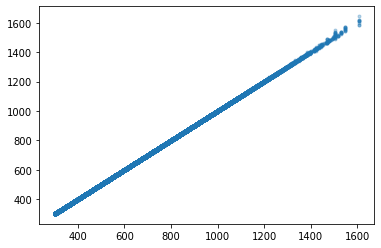

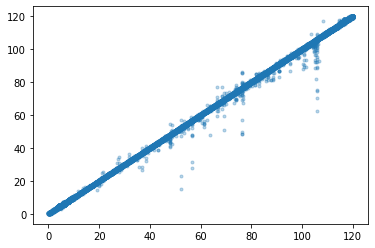

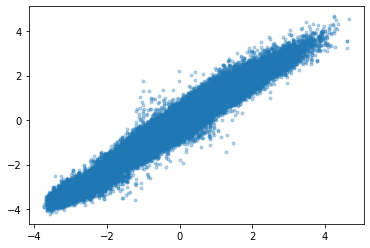

In [102]:
plt.plot(q1['mz'], q2['mz'],'.', alpha=0.3)
plt.show()
plt.plot(q1['rtApex'], q2['rt_apex'],'.', alpha=0.3)
plt.show()
plt.plot(q1['norm_z'], q2['norm_z'],'.', alpha=0.3)
plt.show()

In [103]:
dark_blue = '#17212b'
light_blue = '#3dc5ef'
teal= '#42dee1'
green = '#6eecb9'
yellow = '#eef5b3'

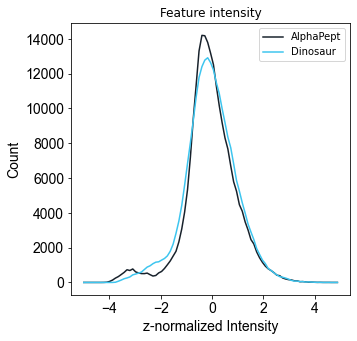

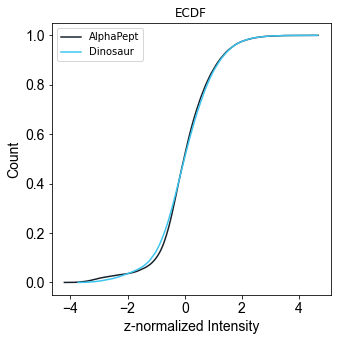

In [147]:
hfont = {'fontname':'Arial', 'size':14}
plt.figure(figsize=(5,5))

bins = np.linspace(-5,5,90)
bins_ = bins[1:] + (bins[0]+-bins[1])
v, b = np.histogram(norm_ap, bins = bins)

plt.plot(bins_, v, label='AlphaPept', color = dark_blue)

v, b = np.histogram(norm_dino, bins = bins)
plt.plot(bins_, v, label='Dinosaur', color = light_blue)

plt.xlabel('z-normalized Intensity', **hfont)
plt.ylabel('Count', **hfont)
plt.xticks(**hfont)
plt.yticks(**hfont)
plt.legend()
plt.title('Feature intensity')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(x_ap,y_ap, label='AlphaPept', color = dark_blue)
plt.plot(x_d,y_d, label='Dinosaur', color = light_blue)

plt.xlabel('z-normalized Intensity', **hfont)
plt.ylabel('Count', **hfont)
plt.xticks(**hfont)
plt.yticks(**hfont)
plt.legend()
plt.title('ECDF')
plt.show()

## Convert raw file

In [4]:
import alphapept.settings
import alphapept.paths
import alphapept.interface

test_folder = os.path.join(tmp_folder, test_folder)

file_name = os.path.join(test_folder, files[0])
settings = alphapept.settings.load_settings(alphapept.paths.DEFAULT_SETTINGS_PATH)
settings['experiment']['file_paths'] = [file_name]
settings_ = alphapept.interface.import_raw_data(settings)
base, ext = os.path.splitext(file_name)

2021-06-05 18:49:23> Logging to C:\Users\admin\alphapept\logs\log_20210605184923.txt.
2021-06-05 18:49:23> Platform information:
2021-06-05 18:49:23> system     - Windows
2021-06-05 18:49:23> release    - 10
2021-06-05 18:49:23> version    - 10.0.18363
2021-06-05 18:49:23> machine    - AMD64
2021-06-05 18:49:23> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-06-05 18:49:23> cpu count  - 24
2021-06-05 18:49:23> ram memory - 105.0/127.7 Gb (available/total)
2021-06-05 18:49:23> 
2021-06-05 18:49:23> Python information:
2021-06-05 18:49:23> SQLAlchemy     - 1.3.22
2021-06-05 18:49:23> alphapept      - 0.3.26
2021-06-05 18:49:23> biopython      - 1.78
2021-06-05 18:49:23> click          - 7.1.2
2021-06-05 18:49:23> comtypes       - 1.1.7
2021-06-05 18:49:23> fastcore       - 1.3.5
2021-06-05 18:49:23> h5py           - 3.1.0
2021-06-05 18:49:23> lxml           - 4.6.2
2021-06-05 18:49:23> matplotlib     - 3.3.3
2021-06-05 18:49:23> nbdev          - 1.1.4
2021-06-05 18:

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 18:49:23> Processing 1 files for step raw_conversion
2021-06-05 18:49:23> File F:\alphapept\sandbox\temp/fig3\thermo_HeLa has extension .raw - converting from Thermo.
2021-06-05 18:51:32> File conversion complete. Extracted 120,226 precursors.
2021-06-05 18:51:34> File conversion of file F:\alphapept\sandbox\temp/fig3\thermo_HeLa.raw complete.


## Prepare settings for Feature Finder

In [5]:
import numpy as np

ms_file = alphapept.io.MS_Data_File(f"{base}.ms_data.hdf", is_read_only=True)
query_data = ms_file.read_DDA_query_data()
int_data = np.array(query_data['int_list_ms1'])

f_settings = settings['features']
max_gap = f_settings['max_gap']
centroid_tol = f_settings['centroid_tol']
hill_split_level = f_settings['hill_split_level']
hill_smoothing = f_settings['hill_smoothing']
hill_check_large = f_settings['hill_check_large']

iso_charge_min = f_settings['iso_charge_min']
iso_charge_max = f_settings['iso_charge_max']
iso_n_seeds = f_settings['iso_n_seeds']

hill_nboot_max = f_settings['hill_nboot_max']
hill_nboot = f_settings['hill_nboot']
iso_mass_range = f_settings['iso_mass_range']

iso_corr_min = f_settings['iso_corr_min']

In [6]:
import timeit
import time
import alphapept.performance
import alphapept.feature_finding
import importlib
import logging

def timing_decorator(func, timings_dict, repeats=3, loops_per_repeat=1):
    def wrapper(*args, **kwargs):
        if func.__name__ not in timings_dict:
            timings_dict[func.__name__] = {}
        if alphapept.performance.COMPILATION_MODE in timings_dict[func.__name__]:
            logging.warning(
                f"{func.__name__} is already timed for {alphapept.performance.COMPILATION_MODE}"
            )
        start = time.time()
        results = func(*args, **kwargs)
        timings_dict[func.__name__][alphapept.performance.COMPILATION_MODE] = time.time() - start
        return results
    return wrapper

2021-06-05 18:51:34> init


  0%|                                                                                            | 0/1 [02:11<?, ?it/s]


In [7]:
def time_feature_finding_functions(
    compilation_mode,
    timings_dict,
    repeats=3,
    loops_per_repeat=1
):
    print(f"Running feature finding functions with compilation mode '{compilation_mode}'")
    alphapept.performance.set_compilation_mode(compilation_mode)
    importlib.reload(alphapept.feature_finding)
    alphapept.feature_finding.connect_centroids_unidirection = timing_decorator(
        alphapept.feature_finding.connect_centroids_unidirection,
        timings_dict,
        repeats=3,
        loops_per_repeat=1
    )
    alphapept.feature_finding.convert_connections_to_array = timing_decorator(
        alphapept.feature_finding.convert_connections_to_array,
        timings_dict,
        repeats=3,
        loops_per_repeat=1
    )
    alphapept.feature_finding.eliminate_overarching_vertex = timing_decorator(
        alphapept.feature_finding.eliminate_overarching_vertex,
        timings_dict,
        repeats=3,
        loops_per_repeat=1
    )
    alphapept.feature_finding.path_finder = timing_decorator(
        alphapept.feature_finding.path_finder,
        timings_dict,
        repeats=3,
        loops_per_repeat=1
    )
    alphapept.feature_finding.find_path_start = timing_decorator(
        alphapept.feature_finding.find_path_start,
        timings_dict,
        repeats=3,
        loops_per_repeat=1
    )
    alphapept.feature_finding.find_path_length = timing_decorator(
        alphapept.feature_finding.find_path_length,
        timings_dict,
        repeats=3,
        loops_per_repeat=1
    )
    alphapept.feature_finding.fill_path_matrix = timing_decorator(
        alphapept.feature_finding.fill_path_matrix,
        timings_dict,
        repeats=3,
        loops_per_repeat=1
    )
        
    logging.info(f'Hill extraction with centroid_tol {centroid_tol} and max_gap {max_gap}')
    hill_ptrs, hill_data, path_node_cnt, score_median, score_std = alphapept.feature_finding.extract_hills(query_data, max_gap, centroid_tol)
    logging.info(f'Number of hills {len(hill_ptrs):,}, len = {np.mean(path_node_cnt):.2f}')

In [8]:
timings_dict = {}

modes = ["cuda", "numba-multithread", "numba", "python"]

for mode in modes:
    time_feature_finding_functions(mode, timings_dict)


Running feature finding functions with compilation mode 'cuda'
2021-06-05 18:51:36> Hill extraction with centroid_tol 8 and max_gap 2
2021-06-05 18:51:39> Number of hills 1,105,353, len = 17.35
Running feature finding functions with compilation mode 'numba-multithread'
2021-06-05 18:51:39> Hill extraction with centroid_tol 8 and max_gap 2
2021-06-05 18:51:47> Number of hills 1,105,353, len = 17.35
Running feature finding functions with compilation mode 'numba'
2021-06-05 18:51:47> Hill extraction with centroid_tol 8 and max_gap 2
2021-06-05 18:51:56> Number of hills 1,105,353, len = 17.35
Running feature finding functions with compilation mode 'python'
2021-06-05 18:51:56> Hill extraction with centroid_tol 8 and max_gap 2
2021-06-05 18:57:22> Number of hills 1,105,353, len = 17.35


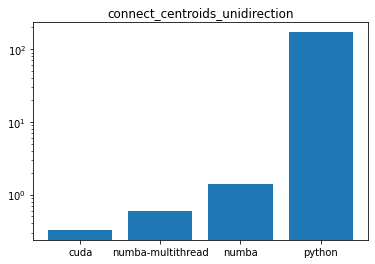

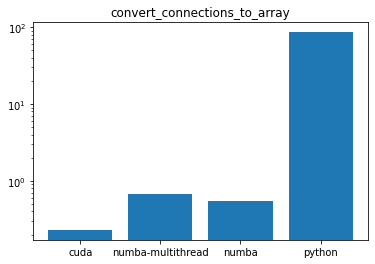

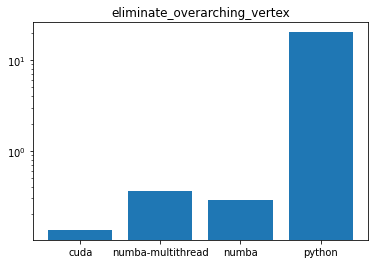

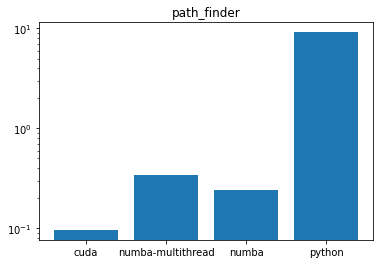

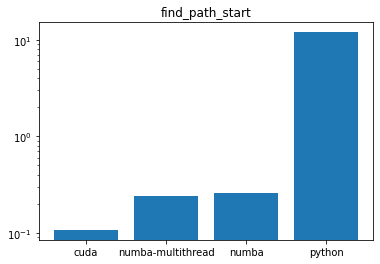

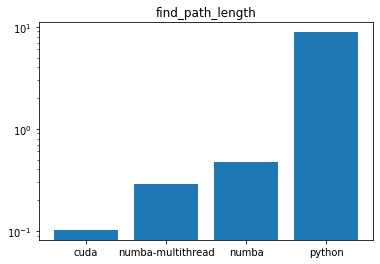

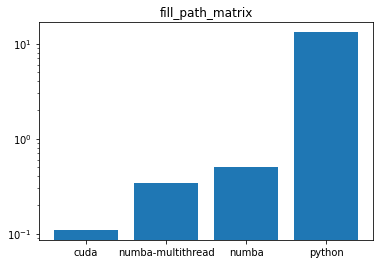

In [9]:
from matplotlib import pyplot as plt
include_python = True
for func in timings_dict:
    if not include_python:
        plt.bar(list(timings_dict[func].keys())[:-1], list(timings_dict[func].values())[:-1])
    else:
        plt.bar(list(timings_dict[func].keys()), list(timings_dict[func].values()))
    plt.yscale('log')
    plt.title(func)
    plt.show()

## Get summary timing

<ipython-input-18-c98abfbcce4d>:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 1000])


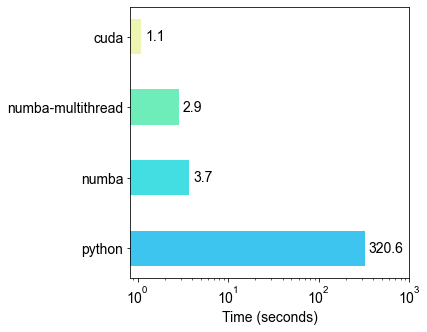

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dark_blue = '#17212b'
light_blue = '#3dc5ef'
teal= '#42dee1'
green = '#6eecb9'
yellow = '#eef5b3'

colors = [light_blue, teal, green, yellow]
data = pd.DataFrame.from_dict(timings_dict).sum(axis=1).iloc[::-1]

hfont = {'fontname':'Arial', 'size':14}
plt.figure(figsize=(5,5))

height=0.5

for i in range(len(data)): 
    t = data[i]
    plt.barh(i, t, height, color = colors[i])
    plt.text(t*1.1, i, f'{t:.1f}', **hfont, va='center')

plt.yticks(range(len(data)), data.index, **hfont)
plt.xticks(**hfont)

plt.xscale('log')
plt.xlim([0, 1000])
plt.xlabel('Time (seconds)', **hfont)

plt.savefig('p_03_ff.pdf')  
plt.show()